# Scanpy tutorial
following along the [official one](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).


1. data download

In [24]:
# !mkdir data
# !wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
# !cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
# !mkdir write

2. install libraries and scanpy setup

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3 # verbosity: errors(0), warnings(1), info(2), hints(3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'viridis_r')

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.0 pynndescent==0.5.5


In [4]:
# write a file that will store the analysis results
results_file = "write/pbmc3k.h5ad"

reading data into an [`AnnData`-object](https://anndata.readthedocs.io/en/latest/),
 useful for annotations and different representations of the data.  
 <img alt="anndata" height="5" src="figures/anndata_for_r.png" width="5"/>
 
mtx - file format: format for storing gene expression matrix

In [5]:
annotated_data = sc.read_10x_mtx(
    'data/filtered_gene_bc_matrices/hg19/',  # dir with matrix file `.mtx`
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                               # write a cache file for faster subsequent reading

annotated_data.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

... reading from cache file cache/data-filtered_gene_bc_matrices-hg19-matrix.h5ad


normalizing counts per cell
    finished (0:00:00)


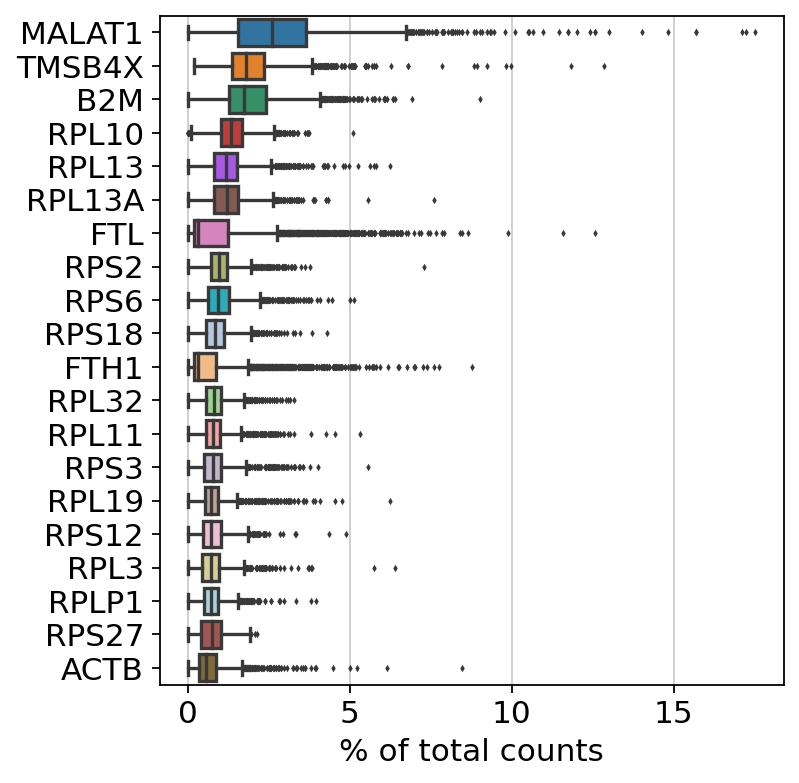

In [6]:
sc.pl.highest_expr_genes(annotated_data, n_top=20, )

In [8]:
# Basic filtering

sc.pp.filter_cells(annotated_data, min_genes=200)
sc.pp.filter_genes(annotated_data, min_cells=3)

Assembly of information about mitochondrial genes, which are important for QC

In [ ]:
annotated_data.var['mt'] = annotated_data.var_names.str.startswith('MT-') # annotate the group of mitochondrial genes as "mt"
sc.pp.calculate_qc_metrics(annotated_data, )